# Test For The Best Machine Learning Algorithm For Prediction

This notebook takes about 40 minutes to run, but we've already run it and saved the data for you. Please read through it, though, so that you understand how we came to the conclusions we'll use moving forward.

## Six Algorithms

We're going to compare six different algorithms to determine the best one to produce an accurate model for our predictions.

### Logistic Regression

Logistic Regression (LR) is a technique borrowed from the field of statistics. It is the go-to method for binary classification problems (problems with two class values). 

![](./docs/logisticfunction.png)

Logistic Regression is named for the function used at the core of the method: the logistic function. The logistic function is a probablistic method used to determine whether or not the driver will be the winner. Logistic Regression predicts probabilities.

### Decision Tree

A tree has many analogies in real life, and it turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making.

![](./docs/decisiontree.png)

This methodology is more commonly known as a "learning decision tree" from data, and the above tree is called a Classification tree because the goal is to classify a driver as the winner or not.

### Random Forest

Random forest is a supervised learning algorithm. The "forest" it builds is an **ensemble of decision trees**, usually trained with the “bagging” method, a combination of learning models which increases the accuracy of the result.

A random forest eradicates the limitations of a decision tree algorithm. It reduces the overfitting of datasets and increases precision. It generates predictions without requiring many configurations.

![](./docs/randomforest.png)

Here's the difference between the Decision Tree and Random Forest methods:

![](./docs/treefortheforest.jpg)

### Support Vector Machine Algorithm (SVC)

Support Vector Machines (SVMs) are a set of supervised learning methods used for classification, regression and detection of outliers.

The advantages of support vector machines are:

- Effective in high dimensional spaces
- Still effective in cases where number of dimensions is greater than the number of samples
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient
- Versatile: different kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels

The objective of a SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data.

### Gaussian Naive Bayes Algorithm

Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values. The representation used for naive Bayes is probabilities.

A list of probabilities is stored to a file for a learned Naive Bayes model. This includes:

- **Class Probabilities:** The probabilities of each class in the training dataset.
- **Conditional Probabilities:** The conditional probabilities of each input value given each class value.

Naive Bayes can be extended to real-value attributes, most commonly by assuming a Gaussian distribution. This extension of Naive Bayes is called Gaussian Naive Bayes. Other functions can be used to estimate the distribution of the data, but the Gaussian (or normal distribution) is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data.

### k Nearest Neighbor Algorithm (kNN)

The k-Nearest Neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.

kNN works by finding the distances between a query and all of the examples in the data, selecting the specified number examples (k) closest to the query, then voting for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

The kNN algorithm assumes the similarity between the new case/data and available cases, and puts the new case into the category that is most similar to the available categories.

![](./docs/knn.png)

## Analyzing the Data

### Feature Importance

Another great quality of the random forest algorithm is that it's easy to measure the relative importance of each feature to the prediction.

The Scikit-learn Python Library provides a great tool for this which measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity across all trees in the forest. It computes this score automatically for each feature after training, and scales the results so the sum of all importance is equal to one.

### Data Visualization When Building a Model

How do you visualize the influence of the data? How do you frame the problem?

An important tool in the data scientist's toolkit is the power to visualize data using several excellent libraries such as Seaborn or MatPlotLib. Representing your data visually might allow you to uncover hidden correlations that you can leverage. Your visualizations might also help you to uncover bias or unbalanced data.

![](./docs/visualization.png)

### Splitting the Dataset

Prior to training, you need to split your dataset into two or more parts of unequal size that still represent the data well. 

1. Training. This part of the dataset is fit to your model to train it. This set constitutes the majority of the original dataset.
2. Testing. A test dataset is an independent group of data, often a subset of the original data, that you use to confirm the performance of the model you built.
3. Validating. A validation set is a smaller independent group of examples that you use to tune the model's hyperparameters, or architecture, to improve the model. Depending on your data's size and the question you are asking, you might not need to build this third set.

## Building the Model

Using your training data, your goal is to build a model, or a statistical representation of your data, using various algorithms to train it. Training a model exposes it to data and allows it to make assumptions about perceived patterns it discovers, validates, and accepts or rejects.


### Decide on a Training Method

Depending on your question and the nature of your data, you will choose a method to train it. Stepping through Scikit-learn's documentation, you can explore many ways to train a model. Depending on the results you get, you might have to try several different methods to build the best model. You are likely to go through a process whereby data scientists evaluate the performance of a model by feeding it unseen data, checking for accuracy, bias, and other quality-degrading issues, and selecting the most appropriate training method for the task at hand.

### Train a Model

Armed with your training data, you are ready to "fit" it to create a model. In many ML libraries you will find the code 'model.fit' - it is at this time that you send in your data as an array of values (usually 'X') and a feature variable (usually 'y').

### Evaluate the Model

Once the training process is complete, you will be able to evaluate the model's quality by using test data to gauge its performance. This data is a subset of the original data that the model has not previously analyzed. You can print out a table of metrics about your model's quality.

#### Model Fitting

In the Machine Learning context, model fitting refers to the accuracy of the model's underlying function as it attempts to analyze data with which it is not familiar.

#### Underfitting and Overfitting

Underfitting and overfitting are common problems that degrade the quality of the model, as the model either doesn't fit well enough, or it fits too well. This causes the model to make predictions either too closely aligned or too loosely aligned with its training data. An overfit model predicts training data too well because it has learned the data's details and noise too well. An underfit model is not accurate as it can neither accurately analyze its training data nor data it has not yet 'seen'.

![](./docs/overfit.png)

Let's test out some algorithms to choose our path for modelling our predictions.



In [180]:
import warnings
warnings.filterwarnings("ignore")

In [181]:
import time
start = time.time()

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
plt.style.use('seaborn')

np.set_printoptions(precision=4)

In [183]:
data = pd.read_csv('./data_f1/data_filtered.csv')

In [184]:
data.head()

,raceId,year,round,circuitId,name_x,date,time_x,url_x,fp1_date,fp1_time,...,lat,lng,alt,url_b,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Nick Heidfeld,12374,0,0,0,1
1,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,http://en.wikipedia.org/wiki/2010_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Robert Kubica,9242,0,0,0,0
2,969,2017,1,1,Australian Grand Prix,2017-03-26,05:00:00,http://en.wikipedia.org/wiki/2017_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Nico Hülkenberg,10812,0,0,0,1
3,989,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,http://en.wikipedia.org/wiki/2018_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Nico Hülkenberg,11176,0,0,0,0
4,1010,2019,1,1,Australian Grand Prix,2019-03-17,05:10:00,http://en.wikipedia.org/wiki/2019_Australian_G...,\N,\N,...,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Nico Hülkenberg,11533,0,0,0,1


In [163]:
len(data)

5483

In [185]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

In [186]:
driver_confidence_dict

{'Adrian Sutil': 0.868421052631579,
 'Alexander Albon': 0.9310344827586207,
 'Alexander Rossi': 1.0,
 'André Lotterer': 1.0,
 'Antonio Giovinazzi': 0.9180327868852459,
 'Brendon Hartley': 0.88,
 'Bruno Senna': 0.8260869565217391,
 'Carlos Sainz': 0.9012345679012346,
 'Charles Leclerc': 0.8932038834951457,
 'Charles Pic': 0.9487179487179487,
 'Christian Klien': 1.0,
 'Daniel Ricciardo': 0.9523809523809523,
 'Daniil Kvyat': 0.9196428571428571,
 'Esteban Gutiérrez': 0.847457627118644,
 'Esteban Ocon': 0.9545454545454546,
 'Felipe Massa': 0.9161290322580645,
 'Felipe Nasr': 0.925,
 'Fernando Alonso': 0.935483870967742,
 'George Russell': 0.926829268292683,
 'Giedo van der Garde': 0.8421052631578947,
 'Guanyu Zhou': 0.9090909090909091,
 'Heikki Kovalainen': 0.95,
 'Jack Aitken': 1.0,
 'Jaime Alguersuari': 0.9210526315789473,
 'Jarno Trulli': 0.972972972972973,
 'Jean-Éric Vergne': 0.9137931034482758,
 'Jenson Button': 0.9407407407407408,
 'Jolyon Palmer': 0.8571428571428572,
 'Jules Bianchi

In [156]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_reliability = 1-constructor_dnf_ratio
constructor_reliability_dict = dict(zip(constructor_reliability.index,constructor_reliability))

In [157]:
constructor_reliability_dict

{'Alfa Romeo': 0.4260700389105059,
 'AlphaTauri': 0.483495145631068,
 'Alpine F1': 0.5466926070038911,
 'Aston Martin': 0.6170212765957447,
 'Caterham': 0.1785714285714286,
 'Ferrari': 0.8803088803088803,
 'HRT': 0.15652173913043477,
 'Haas F1 Team': 0.36585365853658536,
 'Lotus': 0.07894736842105265,
 'Manor Marussia': 0.12121212121212122,
 'Marussia': 0.16666666666666663,
 'McLaren': 0.6233009708737864,
 'Mercedes': 0.8916827852998066,
 'Red Bull': 0.8430232558139534,
 'Virgin': 0.09210526315789469,
 'Williams': 0.4874274661508704}

In [187]:
data['driver_confidence'] = data['driver'].apply(lambda x:driver_confidence_dict[x])
data['constructor_reliability'] = data['constructor'].apply(lambda x:constructor_reliability_dict[x])
#removing retired drivers and constructors
active_constructors = ['Alpine F1', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Aston Martin', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Mick Schumacher', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Yuki Tsunoda',
                  'Max Verstappen', 'Pierre Gasly', 'Fernando Alonso',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Nikita Mazepin','Nicholas Latifi']
data['active_driver'] = data['driver'].apply(lambda x: int(x in active_drivers))
data['active_constructor'] = data['constructor'].apply(lambda x: int(x in active_constructors))

In [21]:
data.head()

,raceId,year,round,circuitId,name_x,date,time_x,url_x,fp1_date,fp1_time,...,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf,driver_confidence,constructor_reliability,active_driver,active_constructor
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,Nick Heidfeld,12374,0,0,0,1,0.800000,0.546693,0,1
1,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,http://en.wikipedia.org/wiki/2010_Australian_G...,\N,\N,...,Robert Kubica,9242,0,0,0,0,0.976190,0.546693,0,1
2,969,2017,1,1,Australian Grand Prix,2017-03-26,05:00:00,http://en.wikipedia.org/wiki/2017_Australian_G...,\N,\N,...,Nico Hülkenberg,10812,0,0,0,1,0.901639,0.546693,0,1
3,989,2018,1,1,Australian Grand Prix,2018-03-25,05:10:00,http://en.wikipedia.org/wiki/2018_Australian_G...,\N,\N,...,Nico Hülkenberg,11176,0,0,0,0,0.901639,0.546693,0,1
4,1010,2019,1,1,Australian Grand Prix,2019-03-17,05:10:00,http://en.wikipedia.org/wiki/2019_Australian_G...,\N,\N,...,Nico Hülkenberg,11533,0,0,0,1,0.901639,0.546693,0,1


In [22]:
data.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name_x', 'date', 'time_x',
       'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date',
       'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
       'resultId', 'driverId', 'constructorId', 'number_x', 'quali_pos',
       'position_x', 'positionText', 'positionOrder', 'points', 'laps',
       'time_y', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'qualifyId', 'number_y', 'position',
       'q1', 'q2', 'q3', 'driverRef', 'number', 'code', 'dob',
       'driver_nationality', 'url_y', 'constructorRef', 'constructor',
       'constructor_nationality', 'url_a', 'circuitRef', 'GP_name', 'location',
       'country', 'lat', 'lng', 'alt', 'url_b', 'driver', 'age_at_gp_in_days',
       'driver_home', 'constructor_home', 'driver_dnf', 'constructor_dnf',
       'driver_confidence', 'constructor_reliability', 'active_driver',
       'active_constructor'],
      dty

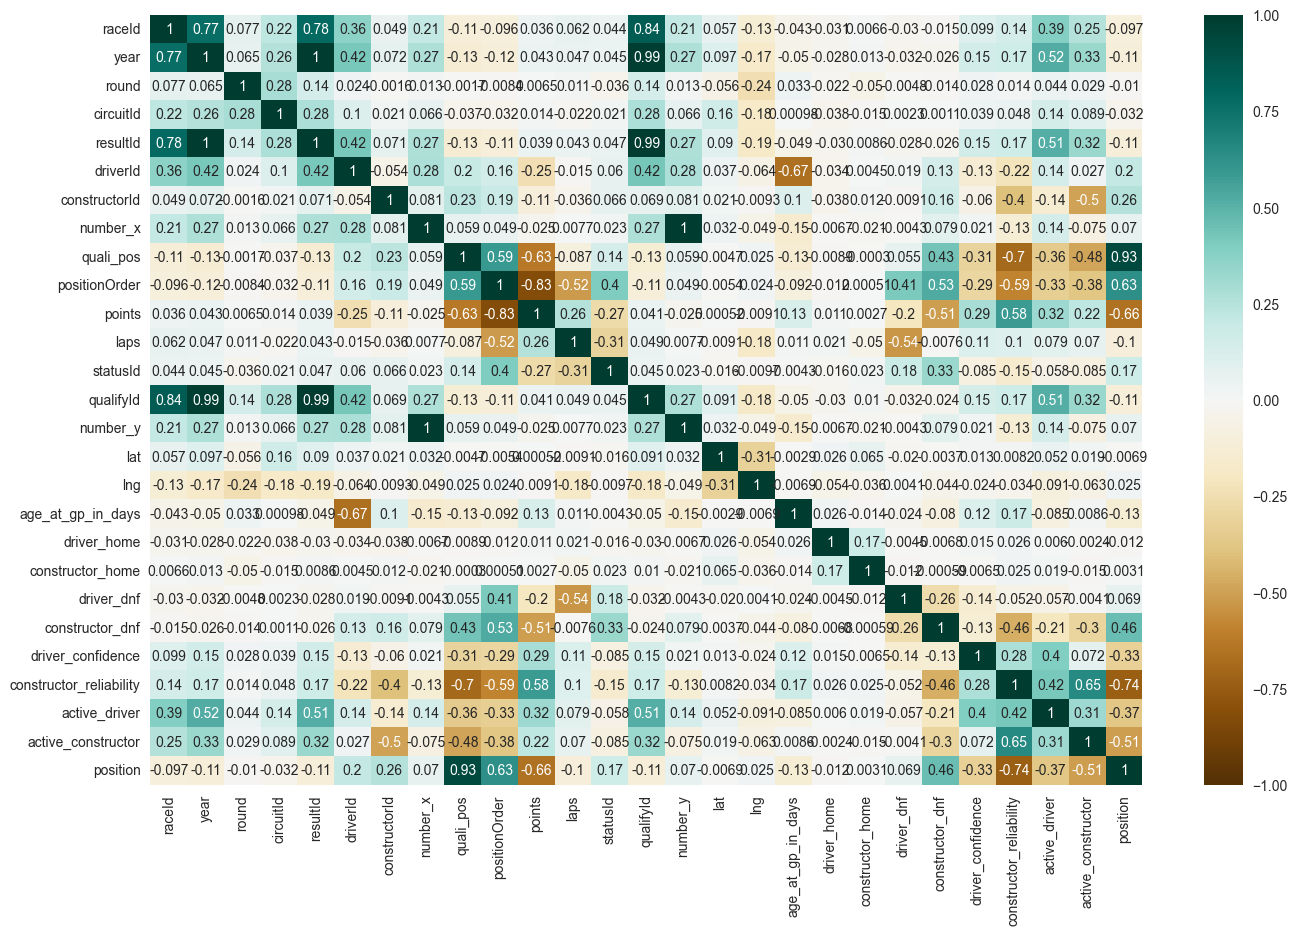

In [23]:
data2 = data[['raceId', 'year', 'round', 'circuitId', 'resultId', 'driverId', 'constructorId', 'number_x', 'quali_pos', 'positionOrder', 'points', 'laps', 'statusId', 'qualifyId', 'number_y', 'lat', 'lng', 'age_at_gp_in_days', 'driver_home', 'constructor_home', 'driver_dnf', 'constructor_dnf', 'driver_confidence', 'constructor_reliability', 'active_driver', 'active_constructor', 'position']]
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [24]:
dataCorr = data[[ 'age_at_gp_in_days','GP_name', 'constructor','driver', 'position' ,'quali_pos', 'positionOrder', 'points', 'constructor_dnf', 'driver_confidence', 'constructor_reliability', 'active_driver', 'active_constructor']]

In [25]:
dataFeat = data[['age_at_gp_in_days','GP_name', 'constructor','driver', 'year', 'round', 'number_x', 'quali_pos', 'positionOrder', 'points', 'laps', 'number_y', 'lat', 'lng', 'driver_home', 'constructor_home', 'driver_dnf', 'constructor_dnf', 'driver_confidence', 'constructor_reliability', 'active_driver', 'active_constructor', 'position']]

## Directory to store Models

In [26]:
import os
if not os.path.exists('./models'):
    os.mkdir('./models')

In [27]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

## Model considering only Drivers

In [28]:
x_d= dataFeat

In [29]:
x_d = x_d[x_d['active_driver']==1]

In [30]:
sc  = StandardScaler()
le = LabelEncoder()
x_d['GP_name'] = le.fit_transform(x_d['GP_name'])
x_d['driver'] = le.fit_transform(x_d['driver'])
#x_d['GP_name'] = le.fit_transform(x_d['GP_name'])
x_d['age_at_gp_in_days'] = sc.fit_transform(x_d[['age_at_gp_in_days']])
X_d = x_d.drop(['position','active_driver', 'constructor'],axis=1)
y_d = x_d['position'].apply(lambda x: position_index(x))

In [31]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier']
model_dict = dict(zip(models,names))
ranking = []

for model in models:
    selector = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
    selector = selector.fit(X_d, y_d)
    ranking.append(selector.ranking_)
    print(f'{model_dict[model]} : {selector.ranking_}')



LogisticRegression : [ 3  9  5 12  6 11  1  4  2  7  8 10 13 17 18 14  1 16  1 15]
DecisionTreeClassifier : [ 2 13  5  8  4 15  1 10  9  3 14 11  6 19 18 16 17 12  7 20]
RandomForestClassifier : [ 3  8  6  9  7 12  1  2  5 11 15 14 13 19 18 17 16 10  4 20]


In [32]:
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=7)
sfs.fit(X_d, y_d)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=7)
sfs.get_support()


array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True])

In [33]:
X_d.columns

Index(['age_at_gp_in_days', 'GP_name', 'driver', 'year', 'round', 'number_x',
       'quali_pos', 'positionOrder', 'points', 'laps', 'number_y', 'lat',
       'lng', 'driver_home', 'constructor_home', 'driver_dnf',
       'constructor_dnf', 'driver_confidence', 'constructor_reliability',
       'active_constructor'],
      dtype='object')

In [34]:
X_d_Lr = X_d[['GP_name', 'driver', 'age_at_gp_in_days', 'quali_pos','positionOrder', 'points', 'constructor_dnf', 'constructor_reliability', 'round', 'laps']]
X_d_Dt = X_d[['GP_name', 'driver', 'age_at_gp_in_days', 'round', 'quali_pos', 'laps', 'lng', 'constructor_reliability', 'year', 'points']]
X_d_Fc = X_d[['GP_name', 'driver', 'age_at_gp_in_days', 'quali_pos', 'positionOrder', 'points', 'constructor_reliability', 'year', 'round', 'driver_confidence']]


In [35]:
X_d_KNN = X_d[['GP_name', 'driver', 'age_at_gp_in_days', 'quali_pos', 'driver_home', 'constructor_home', 'driver_dnf', 'driver_confidence', 'constructor_reliability',
       'active_constructor']]

In [36]:
# DRIVERS' SELECTED FEATURES
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    if(model_dict[model] == 'RandomForestClassifier' or model_dict[model] == 'GaussianNB'): 
        X = X_d_Dt
    else:
        X = X_d_KNN

    result = cross_val_score(model,X,y_d,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8933241106719368
DecisionTreeClassifier : 0.8973214756258235
RandomForestClassifier : 0.9317878787878788
SVC : 0.9194387351778655
GaussianNB : 0.7895520421607378
KNeighborsClassifier : 0.8918682476943346


In [37]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_d_Lr,y_d,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8603056653491435
DecisionTreeClassifier : 0.8882424242424243
RandomForestClassifier : 0.9314229249011857
SVC : 0.8548484848484847
GaussianNB : 0.7325862977602108
KNeighborsClassifier : 0.7695731225296443


In [38]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_d_Dt,y_d,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.791353096179183
DecisionTreeClassifier : 0.8885928853754942
RandomForestClassifier : 0.9321501976284585
SVC : 0.3991304347826087
GaussianNB : 0.7895520421607378
KNeighborsClassifier : 0.7307457180500657


In [39]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_d_Fc,y_d,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8581106719367588
DecisionTreeClassifier : 0.8900566534914361
RandomForestClassifier : 0.9310592885375494
SVC : 0.3991304347826087
GaussianNB : 0.7732147562582344
KNeighborsClassifier : 0.7866297760210803


In [40]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_d_KNN,y_d,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8933241106719368
DecisionTreeClassifier : 0.8947799736495389
RandomForestClassifier : 0.9274308300395256
SVC : 0.9194387351778655
GaussianNB : 0.6426152832674572
KNeighborsClassifier : 0.8918682476943346


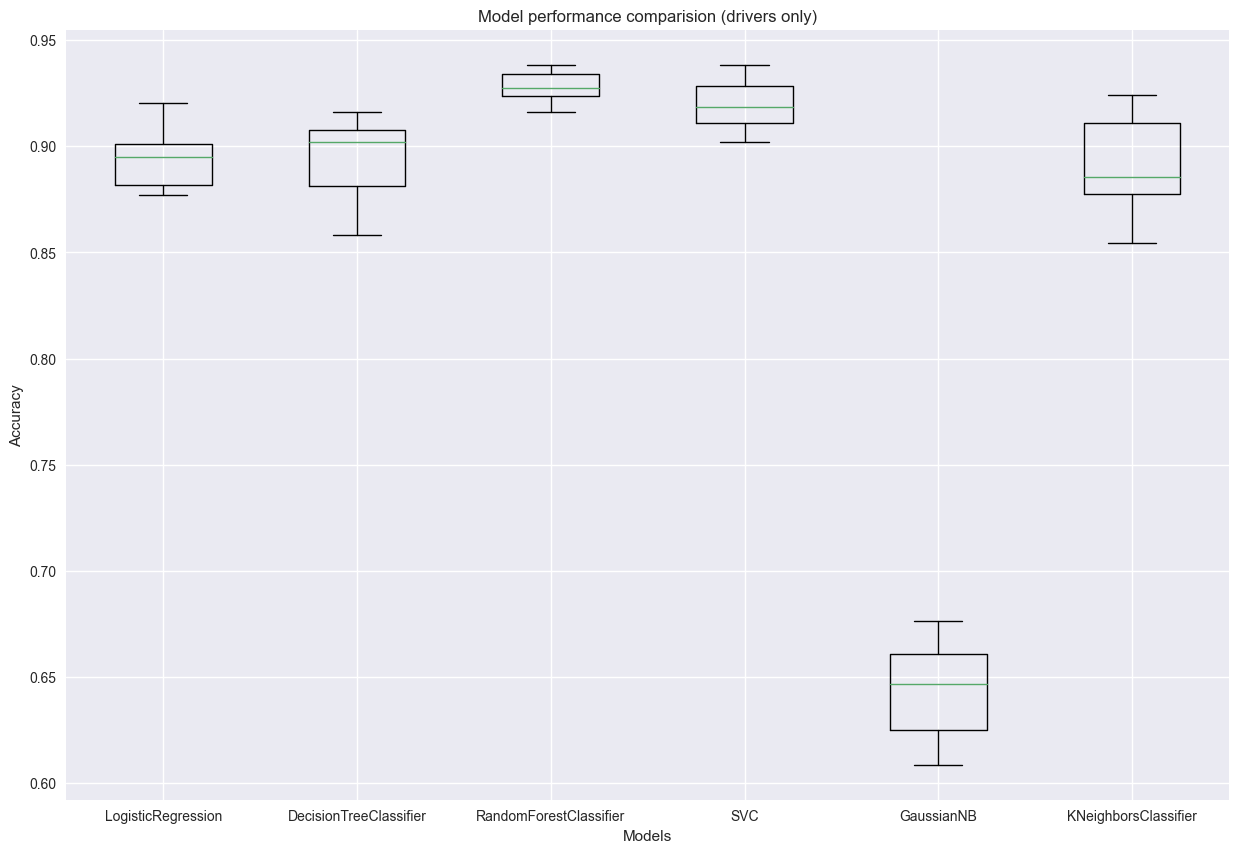

In [41]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_dri,labels=name)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (drivers only)')
plt.show()

## Model considering only Constructors

In [42]:
x_c = dataFeat

In [43]:
x_c = x_c[x_c['active_constructor']==1]

In [44]:
sc  = StandardScaler()
le = LabelEncoder()
x_c['GP_name'] = le.fit_transform(x_c['GP_name'])
x_c['constructor'] = le.fit_transform(x_c['constructor'])
X_c = x_c.drop(['position','active_constructor','driver'],axis=1)
y_c = x_c['position'].apply(lambda x: position_index(x))

In [45]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier']
model_dict = dict(zip(models,names))
ranking = []

for model in models:
    selector = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
    selector = selector.fit(X_c, y_c)
    ranking.append(selector.ranking_)
    print(f'{model_dict[model]} : {selector.ranking_}')



LogisticRegression : [18 13  2 10 12  9  1  4  3  6  7 11  8 16 17 15  1 14  1  5]
DecisionTreeClassifier : [ 2 13 14  7  5 15  1  6 12 10 11  3  8 18 20 17 16  4  9 19]
RandomForestClassifier : [ 3 14 12 10 11  8  1  2  4  9 13 15  7 20 19 18 16  6  5 17]


In [46]:
X_c_Lr = X_c[['GP_name', 'constructor', 'age_at_gp_in_days', 'quali_pos','positionOrder', 'points', 'constructor_reliability', 'constructor_dnf', 'active_driver','laps']]
X_c_Dt = X_c[['GP_name', 'constructor', 'age_at_gp_in_days','round', 'quali_pos', 'positionOrder', 'lat', 'driver_confidence', 'year', 'constructor_reliability']]
X_c_Fc = X_c[['GP_name', 'constructor', 'age_at_gp_in_days', 'number_x', 'quali_pos', 'positionOrder', 'driver_confidence', 'constructor_reliability', 'round', 'lat']]


In [47]:
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=7)
sfs.fit(X_c, y_c)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=7)
sfs.get_support()


array([False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True])

In [48]:
X_c.columns

Index(['age_at_gp_in_days', 'GP_name', 'constructor', 'year', 'round',
       'number_x', 'quali_pos', 'positionOrder', 'points', 'laps', 'number_y',
       'lat', 'lng', 'driver_home', 'constructor_home', 'driver_dnf',
       'constructor_dnf', 'driver_confidence', 'constructor_reliability',
       'active_driver'],
      dtype='object')

In [49]:
X_c_KNN = X_c[['GP_name', 'constructor', 'age_at_gp_in_days', 'quali_pos', 'positionOrder', 'points', 'driver_home', 'constructor_home', 'driver_dnf', 'active_driver']]

In [50]:
# CONSTRUCTORS' SELECTED FEATURES
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    if(model_dict[model] == 'DecisionTreeClassifier'): 
        X = X_c_Dt
    elif(model_dict[model] == 'LogisticRegression' or model_dict[model] == 'KNeighborsClassifier'): 
        X = X_c_KNN
    else:
        X = X_c_Fc

    result = cross_val_score(model,X,y_c,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8405679513184584
DecisionTreeClassifier : 0.9115618661257606
RandomForestClassifier : 0.9460446247464501
SVC : 0.47038539553752534
GaussianNB : 0.8369168356997972
KNeighborsClassifier : 0.6425963488843813


In [51]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_c_Lr,y_c,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8133874239350913
DecisionTreeClassifier : 0.9093306288032454
RandomForestClassifier : 0.943002028397566
SVC : 0.47038539553752534
GaussianNB : 0.7657200811359026
KNeighborsClassifier : 0.611764705882353


In [52]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_c_Dt,y_c,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8042596348884382
DecisionTreeClassifier : 0.9133874239350913
RandomForestClassifier : 0.9456389452332656
SVC : 0.4703853955375254
GaussianNB : 0.8261663286004056
KNeighborsClassifier : 0.5762677484787018


In [53]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_c_Fc,y_c,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8058823529411765
DecisionTreeClassifier : 0.9064908722109533
RandomForestClassifier : 0.9446247464503041
SVC : 0.47038539553752534
GaussianNB : 0.8369168356997972
KNeighborsClassifier : 0.5837728194726167


In [54]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_c_KNN,y_c,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8405679513184584
DecisionTreeClassifier : 0.9020283975659229
RandomForestClassifier : 0.9446247464503044
SVC : 0.47038539553752534
GaussianNB : 0.7904665314401622
KNeighborsClassifier : 0.6425963488843813


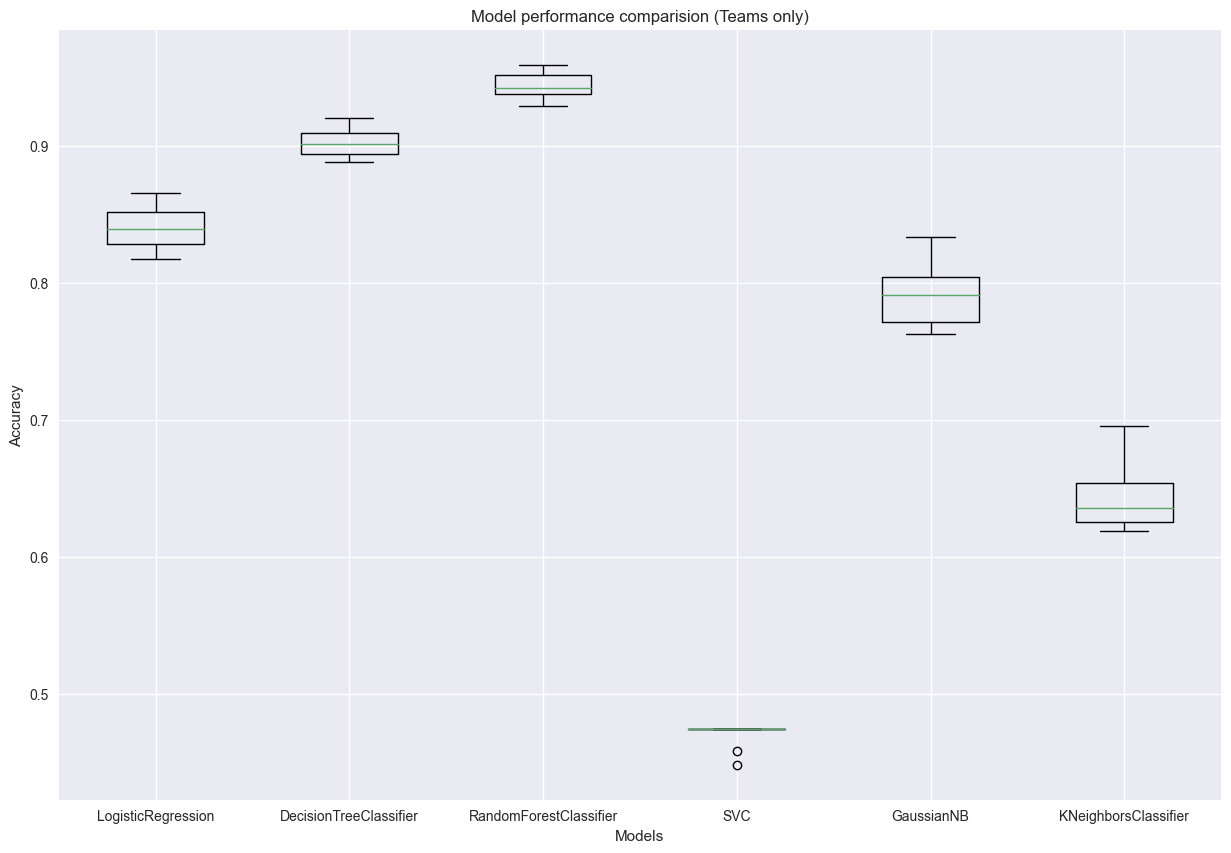

In [55]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_dri,labels=name)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (Teams only)')
plt.show()

# Model considering both Drivers and Constructors

In [56]:
cleaned_data = data[['position', 'active_constructor', 'active_driver', 'GP_name','constructor','driver',  'age_at_gp_in_days', 'quali_pos', 'positionOrder', 'points', 'constructor_reliability', 'year', 'round', 'driver_confidence', 'number_x', 'lat']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]
cleaned_data.to_csv('./data_f1/cleaned_data.csv',index=False)

### Build your X dataset with next columns:
- GP_name
- quali_pos to predict the classification cluster (1,2,3) 
- constructor
- driver
- position
- driver confidence
- constructor_reliability
- active_driver
- active_constructor

In [57]:
cleaned_data = pd.read_csv('./data_f1/cleaned_data.csv')
x_dc = cleaned_data[[ 'position','active_constructor', 'GP_name','constructor','driver','age_at_gp_in_days', 'quali_pos', 'positionOrder', 'points', 'constructor_reliability', 'year', 'round', 'driver_confidence', 'number_x', 'lat']]
x_dc.head()

,position,active_constructor,GP_name,constructor,driver,age_at_gp_in_days,quali_pos,positionOrder,points,constructor_reliability,year,round,driver_confidence,number_x,lat
0,12,1,Albert Park Grand Prix Circuit,Alpine F1,Daniel Ricciardo,10851,12,19,0.0,0.546693,2019,1,0.952381,3,-37.8497
1,9,1,Albert Park Grand Prix Circuit,Alpine F1,Carlos Sainz,8606,9,10,1.0,0.546693,2018,1,0.901235,55,-37.8497
2,16,1,Albert Park Grand Prix Circuit,Williams,Valtteri Bottas,8602,16,14,0.0,0.487427,2013,1,0.950249,17,-37.8497
3,10,1,Albert Park Grand Prix Circuit,Williams,Valtteri Bottas,8966,15,5,10.0,0.487427,2014,1,0.950249,77,-37.8497
4,6,1,Albert Park Grand Prix Circuit,Williams,Valtteri Bottas,9330,0,18,0.0,0.487427,2015,1,0.950249,77,-37.8497


### Filter the dataset for this Model "Driver + Constructor" all active drivers and constructors

In [58]:
x_dc = x_dc[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]

### Create Standard Scaler and Label Encoder for the different features in order to have a similar scale for all features

In [59]:
sc  = StandardScaler()
le = LabelEncoder()

### Prepare the X (Features dataset) and y for predicted value. 
In our case, we want to calculate the cluster of final position for ech driver using the "position_index" function

In [60]:
# Implement X, y
x_dc['GP_name'] = le.fit_transform(x_dc['GP_name'])
x_dc['driver'] = le.fit_transform(x_dc['driver'])
x_dc['constructor'] = le.fit_transform(x_dc['constructor'])
X_dc = x_dc.drop(['position','active_constructor'],axis=1)
y_dc = x_dc['position'].apply(lambda x: position_index(x))

### Applied the same list of ML Algorithms for cross validation of different models

And Store the accuracy Mean Value in order to compare with previous ML Models

In [61]:
mean_results = []
results = []
name = []

In [62]:
# cross validation for different models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_dc,y_dc,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.7409507767172
DecisionTreeClassifier : 0.8907636159460978
RandomForestClassifier : 0.9291155316702762
SVC : 0.4515948771423224
GaussianNB : 0.7690890617897918
KNeighborsClassifier : 0.5732801261998342


In [63]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
le = LabelEncoder()
y_dc = le.fit_transform(y_dc)

In [ ]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=0.5, objective='multi:softmax')
# fit model
#bst.fit(X_dc,y_dc)

cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
result = cross_val_score(bst,X_dc,y_dc,cv=cv,scoring='accuracy')

In [ ]:
result.mean()

0.9356955696371754

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(1, 400, 100),
    'learning_rate': [0.01],
    'objective': ['multi:softmax']
}

In [ ]:
model = XGBClassifier()
scoring = 'accuracy'
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=3, verbose=2)

In [ ]:
grid_search.fit(X_dc,y_dc)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END learning_rate=0.01, max_depth=2, n_estimators=1, objective=multi:softmax; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=1, objective=multi:softmax; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=1, objective=multi:softmax; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=101, objective=multi:softmax; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=101, objective=multi:softmax; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=101, objective=multi:softmax; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=201, objective=multi:softmax; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=201, objective=multi:softmax; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=201, objective=multi:softmax; total time=   0.3s
[CV] END 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01], 'max_depth': range(2, 10),
                         'n_estimators': range(1, 400, 100),
                         'objective': ['multi:softmax']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 101, 'objective': 'multi:softmax'}
Best score: 0.9360500214574405


In [ ]:
# Re-train the model with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_dc,y_dc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=101, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [ ]:
accuracy = best_clf.score(X_dc,y_dc)
print("Testing accuracy:", accuracy)

Testing accuracy: 0.9356960175374498


# Bayes Network Classifier (Categorical Naive Bayes)

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': np.linspace(0.1,1,10),
    'fit_prior': [True, False],
}

In [82]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
scoring = 'accuracy'
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=3, verbose=2)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_dc_normalized = scaler.fit_transform(X_dc)
grid_search.fit(X_dc_normalized,y_dc)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.1, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.1, fit_prior=False; total time=   0.0s
[CV] END ..........................alpha=0.2, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.2, fit_prior=True; total time=   0.0s
[CV] END ..........................alpha=0.2, fit_prior=True; total time=   0.0s
[CV] END .........................alpha=0.2, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.2, fit_prior=False; total time=   0.0s
[CV] END .........................alpha=0.2, fit

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=2)

In [84]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 0.7000000000000001, 'fit_prior': False}
Best score: 0.6825027382256298


In [85]:
best_mnb = grid_search.best_estimator_
best_mnb.fit(X_dc_normalized,y_dc)

MultinomialNB(alpha=0.7000000000000001, fit_prior=False)

In [86]:
accuracy = best_mnb.score(X_dc_normalized,y_dc)
print("Testing accuracy:", accuracy)

Testing accuracy: 0.6795761782974059


### Use the same boxplot plotter used in the previous Models

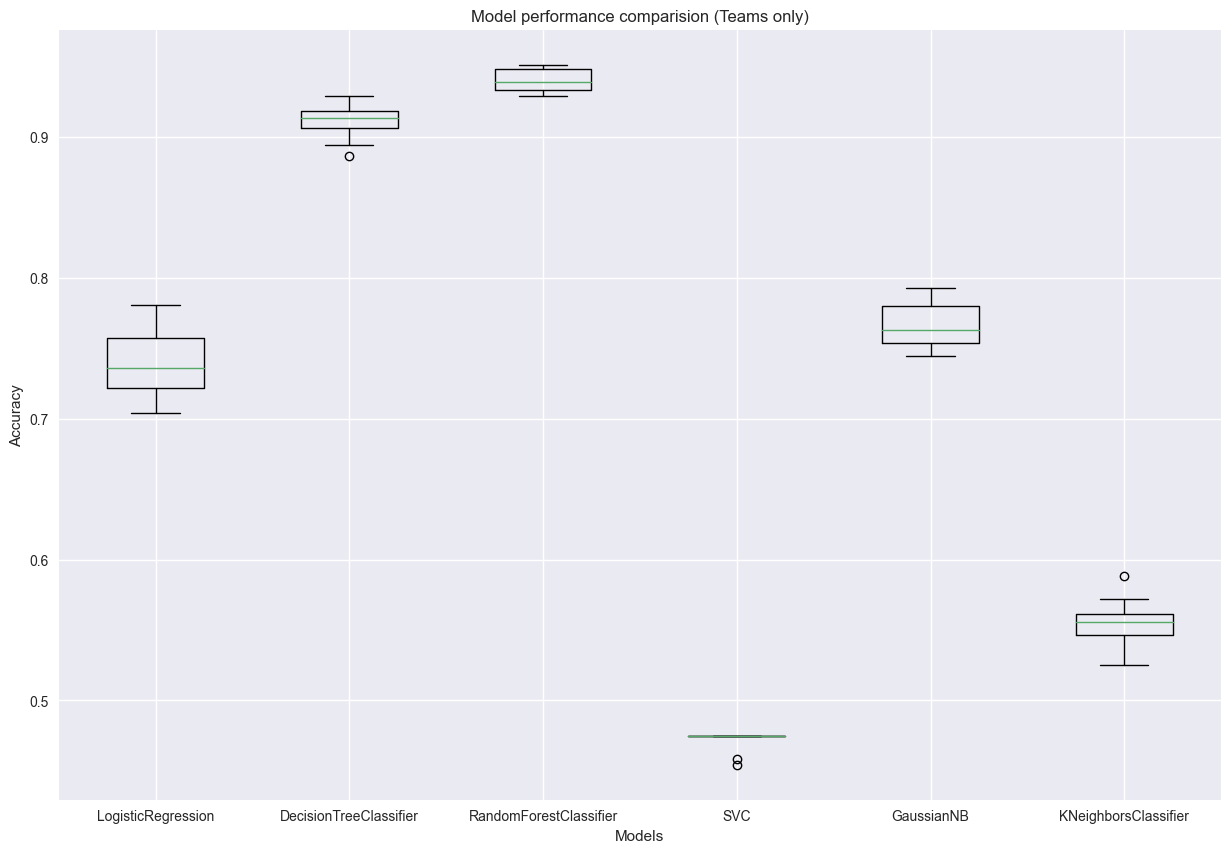

In [ ]:
# Implement boxplot
plt.figure(figsize=(15,10))
plt.boxplot(x=results,labels=name)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (Teams only)')
plt.show()

# Comparing The 3 ML Models

Let's see mean score of our three assumptions.

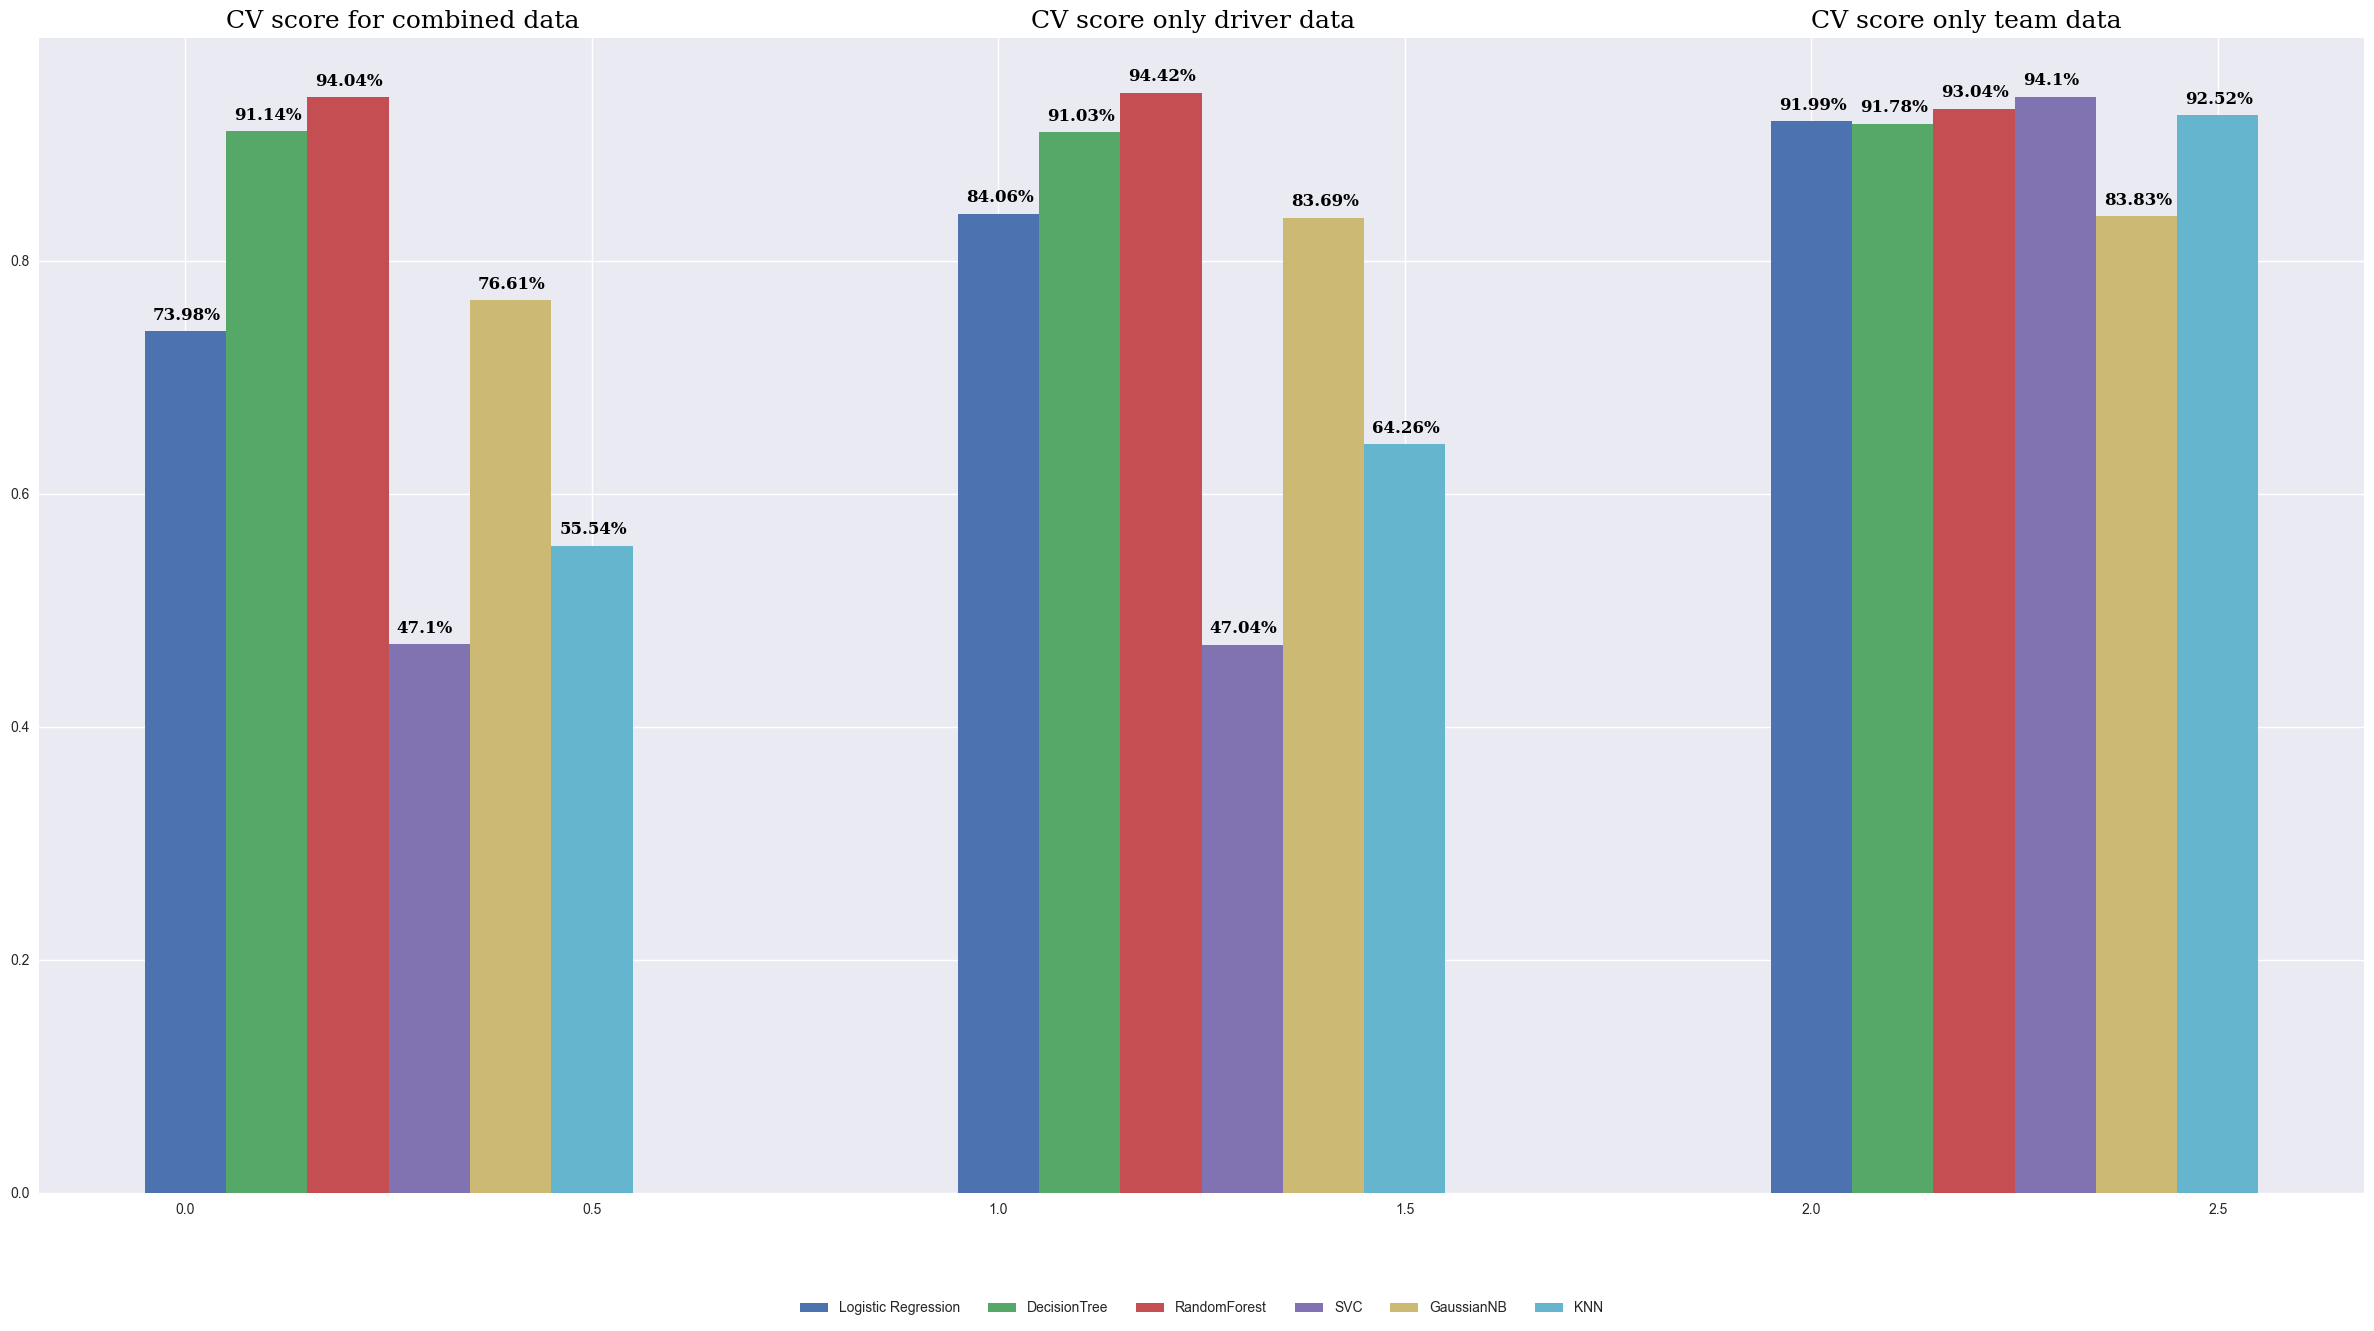

In [ ]:
lr = [mean_results[0],mean_results_dri[0],mean_results_const[0]]
dtc = [mean_results[1],mean_results_dri[1],mean_results_const[1]]
rfc = [mean_results[2],mean_results_dri[2],mean_results_const[2]]
svc = [mean_results[3],mean_results_dri[3],mean_results_const[3]]
gnb = [mean_results[4],mean_results_dri[4],mean_results_const[4]]
knn = [mean_results[5],mean_results_dri[5],mean_results_const[5]]
font1 = {
    'family':'serif',
    'color':'black',
    'weight':'normal',
    'size':18
}
font2 = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':12
}
x_ax = np.arange(3)
plt.figure(figsize=(30,15))
bar1 = plt.bar(x_ax,lr,width=0.1,align='center', label="Logistic Regression")
bar2 = plt.bar(x_ax+0.1,dtc,width=0.1,align='center', label="DecisionTree")
bar3 = plt.bar(x_ax+0.2,rfc,width=0.1,align='center',  label="RandomForest")
bar4 = plt.bar(x_ax+0.3,svc,width=0.1,align='center', label="SVC")
bar5 = plt.bar(x_ax+0.4,gnb,width=0.1,align='center', label="GaussianNB")
bar6 = plt.bar(x_ax+0.5,knn,width=0.1,align='center', label="KNN")
plt.text(0.05,1,'CV score for combined data',fontdict=font1)
plt.text(1.04,1,'CV score only driver data',fontdict=font1)
plt.text(2,1,'CV score only team data',fontdict=font1)
for bar in bar1.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar2.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar3.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar4.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar5.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar6.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=6)

plt.show()

In [ ]:
end = time.time()

In [ ]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'1:05:13.845788'

In [ ]:
print(str(end - start)+" seconds")

3913.845788002014 seconds
